In [ ]:
import nltk

In [ ]:
# Load the Penn Treebank corpus via nltk (it's a 10% percent of the original corpus)
nltk.download('treebank')
corpus = nltk.corpus.treebank.tagged_sents()

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [ ]:
print(len(corpus))
# https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

print(nltk.corpus.treebank.sents()[0])
print(nltk.corpus.treebank.tagged_sents()[0])

3914
['Pierre', 'Vinken', ',', '61', 'years', 'old', ',', 'will', 'join', 'the', 'board', 'as', 'a', 'nonexecutive', 'director', 'Nov.', '29', '.']
[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ('61', 'CD'), ('years', 'NNS'), ('old', 'JJ'), (',', ','), ('will', 'MD'), ('join', 'VB'), ('the', 'DT'), ('board', 'NN'), ('as', 'IN'), ('a', 'DT'), ('nonexecutive', 'JJ'), ('director', 'NN'), ('Nov.', 'NNP'), ('29', 'CD'), ('.', '.')]


In [ ]:
# get the statistics of the labels in the dataset
labels_stats = {}
for sent in nltk.corpus.treebank.tagged_sents():
  for word in sent:
    if word[1] not in labels_stats:
      labels_stats[word[1]] = 1
    else:
      labels_stats[word[1]] += 1
print(labels_stats)

{'NNP': 9410, ',': 4886, 'CD': 3546, 'NNS': 6047, 'JJ': 5834, 'MD': 927, 'VB': 2554, 'DT': 8165, 'NN': 13166, 'IN': 9857, '.': 3874, 'VBZ': 2125, 'VBG': 1460, 'CC': 2265, 'VBD': 3043, 'VBN': 2134, '-NONE-': 6592, 'RB': 2822, 'TO': 2179, 'PRP': 1716, 'RBR': 136, 'WDT': 445, 'VBP': 1321, 'RP': 216, 'PRP$': 766, 'JJS': 182, 'POS': 824, '``': 712, 'EX': 88, "''": 694, 'WP': 241, ':': 563, 'JJR': 381, 'WRB': 178, '$': 724, 'NNPS': 244, 'WP$': 14, '-LRB-': 120, '-RRB-': 126, 'PDT': 27, 'RBS': 35, 'FW': 4, 'UH': 3, 'SYM': 1, 'LS': 13, '#': 16}


<BarContainer object of 46 artists>

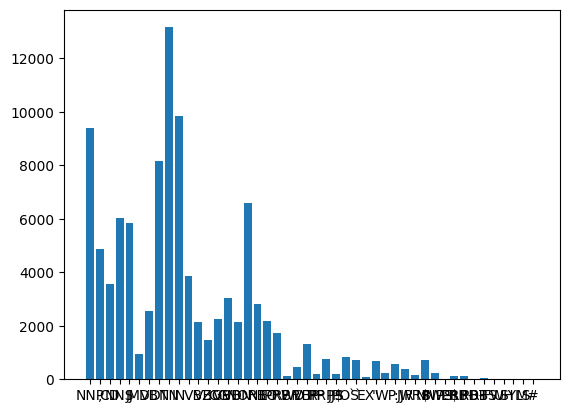

In [ ]:
import matplotlib.pyplot as plt

plt.bar(*zip(*labels_stats.items()))

In [ ]:
from sklearn.model_selection import train_test_split

(x_train, x_test) = train_test_split(corpus, test_size=0.2, random_state=17)

In [ ]:
x_train[0]

[('He', 'PRP'),
 ('adds', 'VBZ'),
 ('that', 'IN'),
 ('his', 'PRP$'),
 ('shares', 'NNS'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('company', 'NN'),
 ('savings', 'NN'),
 ('plan', 'NN'),
 ('are', 'VBP'),
 ('invested', 'VBN'),
 ('*-1', '-NONE-'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('mutual', 'JJ'),
 ('fund', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('volatility', 'NN'),
 (',', ','),
 ('on', 'IN'),
 ('a', 'DT'),
 ('given', 'VBN'),
 ('day', 'NN'),
 (',', ','),
 ('may', 'MD'),
 ('hurt', 'VB'),
 ('the', 'DT'),
 ('fund', 'NN'),
 ('.', '.')]

**Hidden Markov Model**

In [ ]:
hmm_tagger = nltk.tag.HiddenMarkovModelTrainer().train_supervised(x_train)

In [ ]:
test_accuracy = hmm_tagger.evaluate(x_test)
print('Accuracy on the test set = {}'.format(test_accuracy))

<ipython-input-9-3ce353bb3059>:1: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.
  test_accuracy = hmm_tagger.evaluate(x_test)


Accuracy on the test set = 0.3909985935302391


**Conditional Random Field**

In [ ]:
!pip install sklearn-crfsuite

import sklearn_crfsuite
from sklearn_crfsuite import metrics

In [ ]:
# Extract features for each sentence in the corpus
# here a feature is simply the word itself
def get_features(corpus):
  X = []
  y = []
  for sentence in corpus:
    X_sentence = []
    y_sentence = []
    for word in sentence:
      X_sentence.append(word[0])
      y_sentence.append(word[1])
    X.append(X_sentence)
    y.append(y_sentence)
  return X, y

X_train, y_train = get_features(x_train)
X_test, y_test = get_features(x_test)

In [ ]:
print(X_train[0])
print(y_train[0])

['He', 'adds', 'that', 'his', 'shares', 'in', 'a', 'company', 'savings', 'plan', 'are', 'invested', '*-1', 'in', 'a', 'mutual', 'fund', ',', 'and', 'volatility', ',', 'on', 'a', 'given', 'day', ',', 'may', 'hurt', 'the', 'fund', '.']
['PRP', 'VBZ', 'IN', 'PRP$', 'NNS', 'IN', 'DT', 'NN', 'NN', 'NN', 'VBP', 'VBN', '-NONE-', 'IN', 'DT', 'JJ', 'NN', ',', 'CC', 'NN', ',', 'IN', 'DT', 'VBN', 'NN', ',', 'MD', 'VB', 'DT', 'NN', '.']


In [ ]:
# Train a CRF model on the training data
crf = sklearn_crfsuite.CRF(
	algorithm='lbfgs',
	c1=0.1,
	c2=0.1,
	max_iterations=100,
	all_possible_transitions=True
)

# Wrap in a try-except due to bugs known in sklearn and crfsuite
try:
  crf.fit(X_train, y_train)
except AttributeError:
    pass

In [ ]:
# Make predictions on the test data and evaluate the performance
y_pred = crf.predict(X_test)

print('Accuracy on the test set = {}'.format(
    metrics.flat_accuracy_score(y_test, y_pred)))
print('F1 score on the test set = {}'.format(
    metrics.flat_f1_score(y_test, y_pred, average='weighted')))

from itertools import chain
from sklearn.metrics import classification_report

f_y_test = list(chain.from_iterable(y_test))
f_pred_y = list(chain.from_iterable(y_pred))

print('Test set classification report: \n\n{}'.format(
    classification_report(f_y_test, f_pred_y)))

Accuracy on the test set = 0.790775498326786
F1 score on the test set = 0.7867521358350033


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test set classification report: 

              precision    recall  f1-score   support

           #       1.00      1.00      1.00         3
           $       1.00      1.00      1.00       177
          ''       0.99      0.99      0.99       134
           ,       1.00      1.00      1.00      1072
       -LRB-       1.00      1.00      1.00        27
      -NONE-       1.00      1.00      1.00      1377
       -RRB-       1.00      0.96      0.98        27
           .       0.99      1.00      1.00       777
           :       1.00      0.94      0.97       137
          CC       0.91      0.91      0.91       500
          CD       0.95      0.88      0.92       781
          DT       0.82      0.90      0.86      1638
          EX       1.00      0.76      0.87        17
          FW       0.00      0.00      0.00         2
          IN       0.79      0.83      0.81      1974
          JJ       0.51      0.48      0.50      1165
         JJR       0.54      0.29      0.38    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Define a function to extract features for each word in a sentence
# here we consider different features, other features may be added or removed
# try to change them and check model's performances

def word_features(sentence, i):
	word = sentence[i][0]
	features = {
		'word': word,
		'is_first': i == 0, #if the word is a first word
		'is_last': i == len(sentence) - 1, #if the word is a last word
		'is_capitalized': word[0].upper() == word[0],
		'is_all_caps': word.upper() == word,	 #word is in uppercase
		'is_all_lower': word.lower() == word,	 #word is in lowercase
		#prefix of the word
		'prefix-1': word[0],
		'prefix-2': word[:2],
		'prefix-3': word[:3],
		#suffix of the word
		'suffix-1': word[-1],
		'suffix-2': word[-2:],
		'suffix-3': word[-3:],
		#extracting previous word
		'prev_word': '' if i == 0 else sentence[i-1][0],
		#extracting next word
		'next_word': '' if i == len(sentence)-1 else sentence[i+1][0],
		'has_hyphen': '-' in word, #if word has hypen
		'is_numeric': word.isdigit(), #if word is in numeric
		'capitals_inside': word[1:].lower() != word[1:]
	}
	return features

In [ ]:
# Extract features for each sentence in the corpus
def get_features(corpus):
  X = []
  y = []
  for sentence in corpus:
    X_sentence = []
    y_sentence = []
    for i in range(len(sentence)):
      X_sentence.append(word_features(sentence, i))
      y_sentence.append(sentence[i][1])
    X.append(X_sentence)
    y.append(y_sentence)
  return X, y

X_train, y_train = get_features(x_train)
X_test, y_test = get_features(x_test)

In [ ]:
print(X_train[0])
print(y_train[0])

[{'word': 'He', 'is_first': True, 'is_last': False, 'is_capitalized': True, 'is_all_caps': False, 'is_all_lower': False, 'prefix-1': 'H', 'prefix-2': 'He', 'prefix-3': 'He', 'suffix-1': 'e', 'suffix-2': 'He', 'suffix-3': 'He', 'prev_word': '', 'next_word': 'adds', 'has_hyphen': False, 'is_numeric': False, 'capitals_inside': False}, {'word': 'adds', 'is_first': False, 'is_last': False, 'is_capitalized': False, 'is_all_caps': False, 'is_all_lower': True, 'prefix-1': 'a', 'prefix-2': 'ad', 'prefix-3': 'add', 'suffix-1': 's', 'suffix-2': 'ds', 'suffix-3': 'dds', 'prev_word': 'He', 'next_word': 'that', 'has_hyphen': False, 'is_numeric': False, 'capitals_inside': False}, {'word': 'that', 'is_first': False, 'is_last': False, 'is_capitalized': False, 'is_all_caps': False, 'is_all_lower': True, 'prefix-1': 't', 'prefix-2': 'th', 'prefix-3': 'tha', 'suffix-1': 't', 'suffix-2': 'at', 'suffix-3': 'hat', 'prev_word': 'adds', 'next_word': 'his', 'has_hyphen': False, 'is_numeric': False, 'capitals_in

In [ ]:
# try to change hyperparamenters

# Train a CRF model on the training data
crf = sklearn_crfsuite.CRF(
	algorithm='lbfgs',
	c1=0.1,
	c2=0.1,
	max_iterations=100,
	all_possible_transitions=True
)

try:
  crf.fit(X_train, y_train)
except AttributeError:
    pass

# Make predictions on the test data and evaluate the performance
y_pred = crf.predict(X_test)

print('Accuracy on the test set = {}'.format(metrics.flat_accuracy_score(y_test, y_pred)))
print('F1 score on the test set = {}'.format(metrics.flat_f1_score(y_test, y_pred, average='weighted')))

f_y_test = list(chain.from_iterable(y_test))
f_pred_y = list(chain.from_iterable(y_pred))

print('Test set classification report: \n\n{}'.format(classification_report(f_y_test, f_pred_y)))

Accuracy on the test set = 0.9662447257383966
F1 score on the test set = 0.9659780713674087
Test set classification report: 

              precision    recall  f1-score   support

           #       1.00      1.00      1.00         3
           $       1.00      1.00      1.00       177
          ''       1.00      1.00      1.00       134
           ,       1.00      1.00      1.00      1072
       -LRB-       1.00      1.00      1.00        27
      -NONE-       1.00      1.00      1.00      1377
       -RRB-       1.00      1.00      1.00        27
           .       1.00      1.00      1.00       777
           :       1.00      1.00      1.00       137
          CC       1.00      0.99      0.99       500
          CD       0.99      0.99      0.99       781
          DT       0.99      0.99      0.99      1638
          EX       0.94      1.00      0.97        17
          FW       0.00      0.00      0.00         2
          IN       0.97      0.99      0.98      1974
         

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
